In [1]:
# Brían Ó Fearraigh

import numpy as np
import matplotlib.pyplot as plt
import math
from ipywidgets import interact, interactive, fixed, interact_manual, Output
import ipywidgets as widgets
import IPython
from IPython.display import clear_output, display
from array import array
from ctypes import string_at

%matplotlib inline
%precision 6

'%.6f'

# Flux of muon bundles, for given depth and zenith angle
From APP 25 (2006) 1-13, the parametric formula for the flux of bundles is given by:

$ \phi(m;h,\theta) = \cfrac{K(h,\theta)}{m^{\nu(h,theta)}} $ with $\nu = \cfrac{\nu_{1}}{(1 + \Lambda \cdot m)}$ .

For the context of MUPAGE, $\Lambda$ = 0. 

For $m$=1, $\phi$ is the flux of *single* muons, at a vertical depth $h$ and given zenith angle $\theta$, in units of $m^{-2} s^{-1} sr^{-1}$. 

## The parameter $K$

So, 
$ \phi(m=1;h,\theta) = K(h,\theta) = K_{0}(h) \cos \theta e^{K_{1}(h) \cdot \sec \theta} $ ,

where 

$K_{0}(h) = K_{0a} \cdot h^{K_{0b}}$ 

and 

$K_{1}(h) = K_{1a} \cdot h + K_{1b}$.

## The parameter $\nu$

The fraction of multiple muon flux with respect to the single flux is given by:
$\nu(h,\theta) = \nu_{0}(h) e^{\nu_{1}(h) \cdot \sec \theta} $.

Again, there are parameters to vary within $\nu(h,\theta)$:

$\nu_{0}(h) = \nu_{0a} \cdot h^{2} +  \nu_{0b} \cdot h + \nu_{0c} $

and 

$\nu_{1}(h) = \nu_{1a} \cdot e^{\nu_{1b} \cdot h} $.

Below, the (single and multiple) muon flux is plotted for varying parameters. With regards to $K$, the varied parameters seem to only affect the scaling of the distributions. With regards to $\nu$, $\nu_{0b}$ does appear to have some impact on the shape of the plotted flux.

In [2]:
K_0a = 0.0072
K_0b = -1.927
K_1a = -0.581
K_1b = 0.034

theta = np.arange(0, np.pi/2, 0.01)
h = 2.785

In [3]:
#K parameters #########################
def K_0(h, K_0a, K_0b):
    return K_0a * h**(K_0b)

def K_1(h, K_1a, K_1b):
    return K_1a * h + K_1b

def K(h, theta, K_0a, K_0b, K_1a, K_1b):
    return K_0(h, K_0a, K_0b) * np.cos(theta) * np.exp( K_1(h, K_1a, K_1b) * 1./np.cos(theta)  )

In [4]:
#nu parameters #########################
nu_0a = -0.0771
nu_0b = 0.524
nu_0c = 2.068
nu_1a = 0.030
nu_1b = 0.470

def nu_0(h, nu_0a, nu_0b, nu_0c):
    return nu_0a * h**2 + nu_0b * h + nu_0c

def nu_1(h, nu_1a, nu_1b):
    return nu_1a * np.exp(nu_1b * h)

def nu(h, theta, nu_0a, nu_0b, nu_0c, nu_1a, nu_1b):
    return nu_0(h, nu_0a, nu_0b, nu_0c) * np.exp( nu_1(h, nu_1a, nu_1b) * (1./np.cos(theta))  )

def flux(m,h,theta, nu_0a, nu_0b, nu_0c, nu_1a, nu_1b):
    return K(h, theta,K_0a, K_0b, K_1a, K_1b)/m**(nu(h, theta, nu_0a, nu_0b, nu_0c, nu_1a, nu_1b))

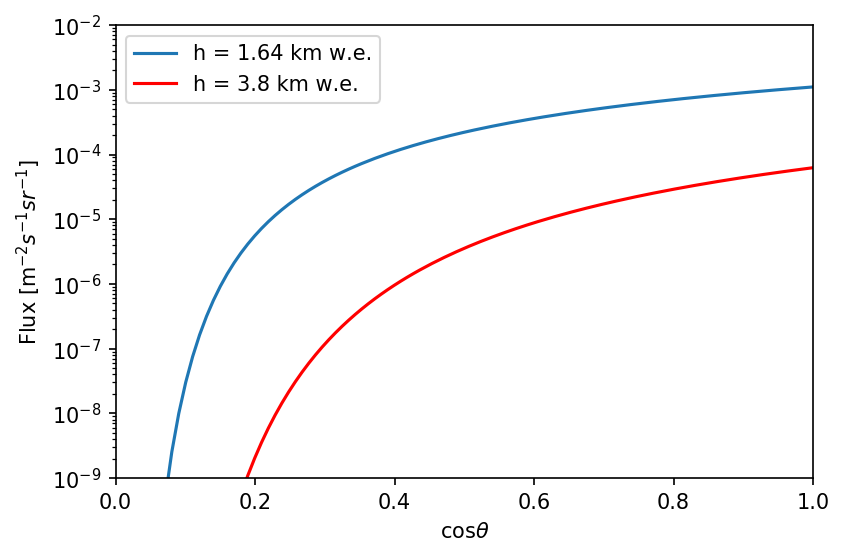

In [6]:
#flux for different values of h, as in APP 25 (2006) 1-13 #########################

plt.plot( np.cos(theta), K(1.64, theta, K_0a, K_0b, K_1a, K_1b), label="h = 1.64 km w.e." )
plt.plot( np.cos(theta), K(3.8, theta, K_0a, K_0b, K_1a, K_1b), 'r', label="h = 3.8 km w.e." )
plt.yscale("log")
plt.xlim(0,1.0)
plt.ylim(1e-9,1e-2)
plt.ylabel(r"Flux [m$^{-2} s^{-1} sr^{-1}$]")
plt.xlabel(r'$\cos {\theta}$')
plt.rcParams['figure.dpi'] = 150
plt.legend()
plt.show()



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in power


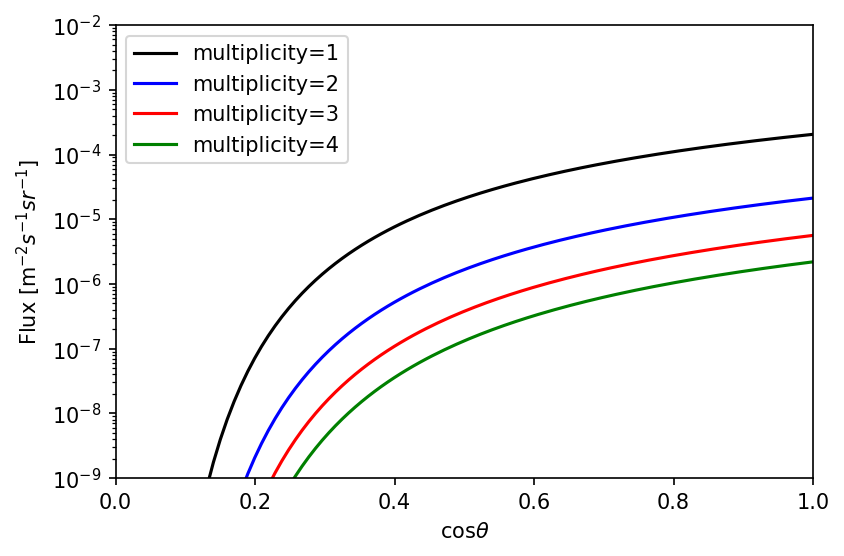

In [7]:
#flux for different values of multiplicity #########################

plt.plot(np.cos(theta),flux(1,h,theta, nu_0a, nu_0b, nu_0c, nu_1a, nu_1b), 'k', label='multiplicity=1'  )
plt.plot(np.cos(theta),flux(2,h,theta, nu_0a, nu_0b, nu_0c, nu_1a, nu_1b), 'b', label='multiplicity=2' )
plt.plot(np.cos(theta),flux(3,h,theta, nu_0a, nu_0b, nu_0c, nu_1a, nu_1b), 'r', label='multiplicity=3')
plt.plot(np.cos(theta),flux(4,h,theta, nu_0a, nu_0b, nu_0c, nu_1a, nu_1b), 'g', label='multiplicity=4')
plt.ylim(1e-9,1e-2)
plt.xlim(0,1.0)
plt.yscale("log")
plt.ylabel(r"Flux [m$^{-2} s^{-1} sr^{-1}$]")
plt.xlabel('cos' r'$\theta$')
plt.legend(loc='upper left')
plt.rcParams['figure.dpi'] = 150
plt.show()

## $K$ parameters

Display an interactive slider to see how these parameters affect the flux, followed by static plots for different values.

In [8]:
opts = dict(continuous_update=False, readout=True,readout_format='.4f')

def f( K_0a=widgets.FloatLogSlider(min=-3, max= -1, value=K_0a,**opts),
       K_0b=widgets.FloatSlider(min=-3.1,max=-0.5,value=K_0b,**opts),
       K_1a=widgets.FloatSlider(min=-1.5,max=-0.1,value=K_1a,**opts),
       K_1b=widgets.FloatLogSlider(min=-4, max=0.1, value=K_1b,**opts)):
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(np.cos(theta), K(h, theta, K_0a, K_0b, K_1a, K_1b))
    ax.set_xlabel(r'$\cos {\theta}$')
    ax.set_ylabel(r"Flux [m$^{-2} s^{-1} sr^{-1}$]")
    ax.set_ylim(1e-9,1e-2)
    ax.set_yscale("log")

interactive_plot = interactive(f)
output = interactive_plot.children[-1]
output.layout = {'height': '600px'}
interactive_plot

interactive(children=(FloatLogSlider(value=0.0072, continuous_update=False, description='K_0a', max=-1.0, min=…

In [ ]:
plt.plot( np.cos(theta), K(h, theta, K_0a, K_0b, K_1a, K_1b), label="K0a: 0.0072 (nominal)" )
plt.plot( np.cos(theta), K(h, theta, 0.0036, K_0b, K_1a, K_1b), label="K0a: 0.0036" )
plt.plot( np.cos(theta), K(h, theta, 0.0108, K_0b, K_1a, K_1b), label="K0a: 0.0108" )
plt.ylim(1e-9,1e-2)
plt.xlim(0,1.0)
plt.yscale("log")
plt.ylabel(r"Flux [m$^{-2} s^{-1} sr^{-1}$]")
plt.xlabel('cos' r'$\theta$')
plt.legend(loc='upper left')
plt.rcParams['figure.dpi'] = 150
plt.show()


In [ ]:
plt.plot( np.cos(theta), K(h, theta, K_0a, K_0b, K_1a, K_1b), label="K0b: -1.927 (nominal)" )
plt.plot( np.cos(theta), K(h, theta, K_0a, -0.9635, K_1a, K_1b), label="K0b: -0.9635" )
plt.plot( np.cos(theta), K(h, theta, K_0a, -2.89, K_1a, K_1b), label="K0b: -2.8905" )
plt.ylim(1e-9,1e-2)
plt.xlim(0,1.0)
plt.yscale("log")
plt.ylabel(r"Flux [m$^{-2} s^{-1} sr^{-1}$]")
plt.xlabel('cos' r'$\theta$')
plt.legend(loc='upper left')
plt.rcParams['figure.dpi'] = 150
plt.show()

In [ ]:
plt.plot( np.cos(theta), K(h, theta, K_0a, K_0b, K_1a, K_1b), label="K1a: -0.581 (nominal)" )
plt.plot( np.cos(theta), K(h, theta, K_0a, K_0b, -0.29, K_1b), label="K1a: -0.29" )
plt.plot( np.cos(theta), K(h, theta, K_0a, K_0b, -0.8715, K_1b), label="K1a: -0.87" )
plt.ylim(1e-9,1e-2)
plt.xlim(0,1.0)
plt.yscale("log")
plt.ylabel(r"Flux [m$^{-2} s^{-1} sr^{-1}$]")
plt.xlabel('cos' r'$\theta$')
plt.legend(loc='upper left')
plt.rcParams['figure.dpi'] = 150
plt.show()

In [ ]:
plt.plot( np.cos(theta), K(h, theta, K_0a, K_0b, K_1a, K_1b), label="K1b: 0.034 (nominal)" )
plt.plot( np.cos(theta), K(h, theta, K_0a, K_0b, K_1a, 0.017), label="K1b: 0.017" )
plt.plot( np.cos(theta), K(h, theta, K_0a, K_0b, K_1a, 0.51), label="K1b: 0.51" )
plt.ylim(1e-9,1e-2)
plt.xlim(0,1.0)
plt.yscale("log")
plt.ylabel(r"Flux [m$^{-2} s^{-1} sr^{-1}$]")
plt.xlabel('cos' r'$\theta$')
plt.legend(loc='upper left')
plt.rcParams['figure.dpi'] = 150
plt.show()

## $\nu$ parameters

Display an interactive slider to see how these parametrs affect the flux, followed by static plots for different values.

In [ ]:
opts = dict(continuous_update=False, readout=True,readout_format='.4f')

def f( nu_0a=widgets.FloatSlider(min=-0.15,max=-0.01,value=nu_0a,step=0.01,**opts),
       nu_0b=widgets.FloatSlider(min=0.1,max=1.5,value=nu_0b,**opts),
       nu_0c=widgets.FloatSlider(min=0.5,max=3,value=nu_0c,**opts),
       nu_1a=widgets.FloatLogSlider(min=-3,max=0.01,value=nu_1a,**opts),
       nu_1b=widgets.FloatSlider(min=0.2, max=1.2, value=nu_1b,**opts)):
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(np.cos(theta),flux(2,h,theta, nu_0a, nu_0b, nu_0c, nu_1a, nu_1b))
    ax.set_xlabel(r'$\cos {\theta}$')
    ax.set_ylabel(r"Flux [m$^{-2} s^{-1} sr^{-1}$]")
    ax.set_ylim(1e-9,1e-2)
    ax.set_yscale("log")

interactive_plot = interactive(f)
output = interactive_plot.children[-1]
output.layout = {'height': '600px'}
interactive_plot

In [ ]:
plt.plot(np.cos(theta),flux(2,h,theta, nu_0a, nu_0b, nu_0c, nu_1a, nu_1b), label='nu_1a: 0.030 (nominal)'  )
plt.plot(np.cos(theta),flux(2,h,theta, nu_0a, nu_0b, nu_0c, 0.015, nu_1b), label='nu_1a: 0.015')
plt.plot(np.cos(theta),flux(2,h,theta, nu_0a, nu_0b, nu_0c, 0.095, nu_1b), label='nu_1a: 0.045')
plt.ylim(1e-9,1e-2)
plt.xlim(0,1.0)
plt.yscale("log")
plt.ylabel(r"Flux [m$^{-2} s^{-1} sr^{-1}$]")
plt.xlabel('cos' r'$\theta$')
plt.legend(loc='upper left')
plt.rcParams['figure.dpi'] = 150
plt.show()

In [ ]:
plt.plot(np.cos(theta),flux(2,h,theta, nu_0a, nu_0b, nu_0c, nu_1a, nu_1b), label='nu_1b: 0.470 (nominal)'  )
plt.plot(np.cos(theta),flux(2,h,theta, nu_0a, nu_0b, nu_0c, nu_1a, 0.235), label='nu_1b: 0.235')
plt.plot(np.cos(theta),flux(2,h,theta, nu_0a, nu_0b, nu_0c, nu_1a, 0.705), label='nu_1b: 0.705')
plt.plot(np.cos(theta),flux(2,h,theta, nu_0a, nu_0b, nu_0c, nu_1a, 0.9), label='nu_1b: 0.9')
plt.ylim(1e-9,1e-2)
plt.xlim(0,1.0)
plt.yscale("log")
plt.ylabel(r"Flux [m$^{-2} s^{-1} sr^{-1}$]")
plt.xlabel('cos' r'$\theta$')
plt.legend(loc='upper left')
plt.rcParams['figure.dpi'] = 150
plt.show()

In [ ]:
plt.plot(np.cos(theta),flux(2,h,theta, nu_0a, nu_0b, nu_0c, nu_1a, nu_1b), label='nu_0a: -0.0771 (nominal)'  )
plt.plot(np.cos(theta),flux(2,h,theta, -0.03855, nu_0b, nu_0c, nu_1a, nu_1b), label='nu_0a: -0.03855')
plt.plot(np.cos(theta),flux(2,h,theta, -0.11565, nu_0b, nu_0c, nu_1a, nu_1b), label='nu_0a: -0.11565')
plt.ylim(1e-9,1e-2)
plt.xlim(0,1.0)
plt.yscale("log")
plt.ylabel(r"Flux [m$^{-2} s^{-1} sr^{-1}$]")
plt.xlabel('cos' r'$\theta$')
plt.legend(loc='upper left')
plt.rcParams['figure.dpi'] = 150
plt.show()

In [ ]:
plt.plot(np.cos(theta),flux(2,h,theta, nu_0a, nu_0b, nu_0c, nu_1a, nu_1b), label='nu_0b: 0.524 (nominal)'  )
plt.plot(np.cos(theta),flux(2,h,theta, nu_0a, 0.262, nu_0c, nu_1a, nu_1b), label='nu_0b: 0.262')
plt.plot(np.cos(theta),flux(2,h,theta, nu_0a, 0.786, nu_0c, nu_1a, nu_1b), label='nu_0b: 0.786')
plt.ylim(1e-9,1e-2)
plt.xlim(0,1.0)
plt.yscale("log")
plt.ylabel(r"Flux [m$^{-2} s^{-1} sr^{-1}$]")
plt.xlabel('cos' r'$\theta$')
plt.legend(loc='upper left')
plt.rcParams['figure.dpi'] = 150
plt.show()

In [ ]:
plt.plot(np.cos(theta),flux(2,h,theta, nu_0a, nu_0b, nu_0c, nu_1a, nu_1b), label='nu_0c: 2.068 (nominal)')
plt.plot(np.cos(theta),flux(2,h,theta, nu_0a, nu_0b, 1.034, nu_1a, nu_1b), label='nu_0c: 1.034')
plt.plot(np.cos(theta),flux(2,h,theta, nu_0a, nu_0b, 3.102, nu_1a, nu_1b), label='nu_0c: 3.102')
plt.ylim(1e-9,1e-2)
plt.xlim(0,1.0)
plt.yscale("log")
plt.ylabel(r"Flux [m$^{-2} s^{-1} sr^{-1}$]")
plt.xlabel('cos' r'$\theta$')
plt.legend(loc='upper left')
plt.rcParams['figure.dpi'] = 150
plt.show()